# Expedition Clustering Showcase
Run the CLI end-to-end (same as `uv run expedition-cluster ...`) from the notebook, then summarize and visualize the results.

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

from expedition_clustering import (
    plot_geographical_heatmap,
    plot_geographical_positions,
    plot_time_histogram,
)

# Parameters
E_DIST_KM = 10.0
E_DAYS = 7.0
LIMIT = 10000  # set None to process all rows
OUTPUT_PATH = "../data/clustered_showcase.csv"

print("Config ->", {
    "E_DIST_KM": E_DIST_KM,
    "E_DAYS": E_DAYS,
    "LIMIT": LIMIT,
    "OUTPUT_PATH": OUTPUT_PATH,
})


Config -> {'E_DIST_KM': 10.0, 'E_DAYS': 7.0, 'LIMIT': 10000, 'OUTPUT_PATH': 'data/clustered_showcase.csv'}


## Run CLI
Uses the same path as the working command-line invocation.

In [8]:
! uv run expedition-cluster --e-dist 7 --e-days 7 --output ../data/clustered_showcase.csv

2025-12-12 16:43:52,372 - INFO - Connecting to MySQL database at localhost:3306...
2025-12-12 16:43:52,379 - INFO - Using only precise locality coordinates (excluding geography centroids)
2025-12-12 16:43:52,379 - INFO - Loading all specimens from database (this may take a while)...
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/cli.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
2025-12-12 16:43:55,446 - INFO - Loaded 239219 rows
2025-12-12 16:43:55,483 - INFO - Processing 239219 specimens...
2025-12-12 16:43:55,483 - INFO - Processing entire dataset in a single pass...
2025-12-12 16:43:55,483 - INFO - Running spatiotemporal clustering (e_dist=7.0km, e_days=7.0 days)...
2025-12-12 16:43:55,483 - INFO - Processing 239219 specimens...
2025-12-12 16:44:56,166 - INFO

## Load clustered output
Loads the CSV written by the CLI.

In [9]:
df = pd.read_csv(OUTPUT_PATH, low_memory=False)
print("Loaded", len(df), "rows from", OUTPUT_PATH)
df.head()

Loaded 10000 rows from data/clustered_showcase.csv


,collectingeventid,startdate,enddate,remarks,localityid,collectionobjectid,text1,minelevation,maxelevation,elevationaccuracy,...,namedplace,geographyid,centroidlat,centroidlon,commonname,fullname,name,spatial_cluster_id,temporal_cluster_id,spatiotemporal_cluster_id
0,433,1882-08-01,1882-08-01,NaN,433,108783,NaN,NaN,NaN,NaN,...,NaN,22905,34.67,-100.0,NaN,"San Bernardino County, California, United States",San Bernardino County,0,0,0
1,601,1894-05-21,1894-05-21,NaN,601,181956,NaN,NaN,NaN,NaN,...,NaN,24553,40.77,-100.0,NaN,"Shasta County, California, United States",Shasta County,1,0,1
2,686,1892-05-22,1892-05-22,NaN,686,171424,NaN,NaN,NaN,NaN,...,NaN,22943,37.77,-100.0,NaN,"San Francisco County, California, United States",San Francisco County,2,0,2
3,1310,1882-07-17,1882-07-17,NaN,1310,195009,NaN,NaN,NaN,NaN,...,NaN,24929,38.55,-100.0,NaN,"Sonoma County, California, United States",Sonoma County,3,0,3
4,1371,1882-07-08,1882-07-08,NaN,1371,368383,NaN,NaN,NaN,NaN,...,NaN,24929,38.55,-100.0,NaN,"Sonoma County, California, United States",Sonoma County,3,1,4


## Summary stats
Basic size distribution and counts.

Total specimens: 10,000
Total expeditions (clusters): 3,841
Average size: 2.60
Median size: 1
Largest: 108
Smallest: 1


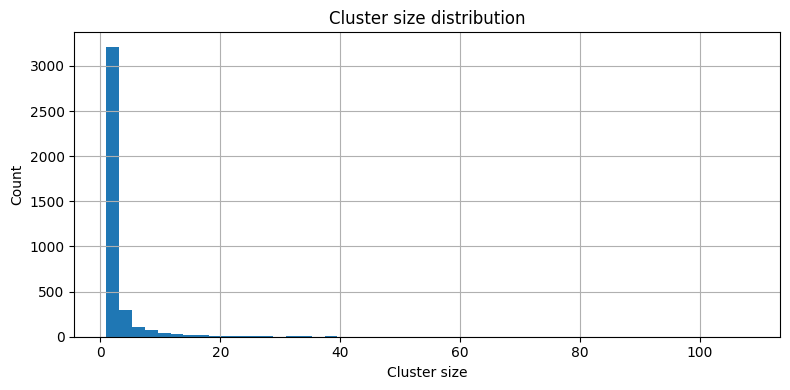

In [10]:
num_clusters = df["spatiotemporal_cluster_id"].nunique()
cluster_sizes = df.groupby("spatiotemporal_cluster_id").size()
print(f"Total specimens: {len(df):,}")
print(f"Total expeditions (clusters): {num_clusters:,}")
print(f"Average size: {cluster_sizes.mean():.2f}")
print(f"Median size: {cluster_sizes.median():.0f}")
print(f"Largest: {cluster_sizes.max()}")
print(f"Smallest: {cluster_sizes.min()}")

fig, ax = plt.subplots(figsize=(8, 4))
cluster_sizes.hist(bins=50, ax=ax)
ax.set_xlabel("Cluster size")
ax.set_ylabel("Count")
ax.set_title("Cluster size distribution")
plt.tight_layout()
plt.show()

## Geospatial visualizations
Heatmap and scatter on a sample.

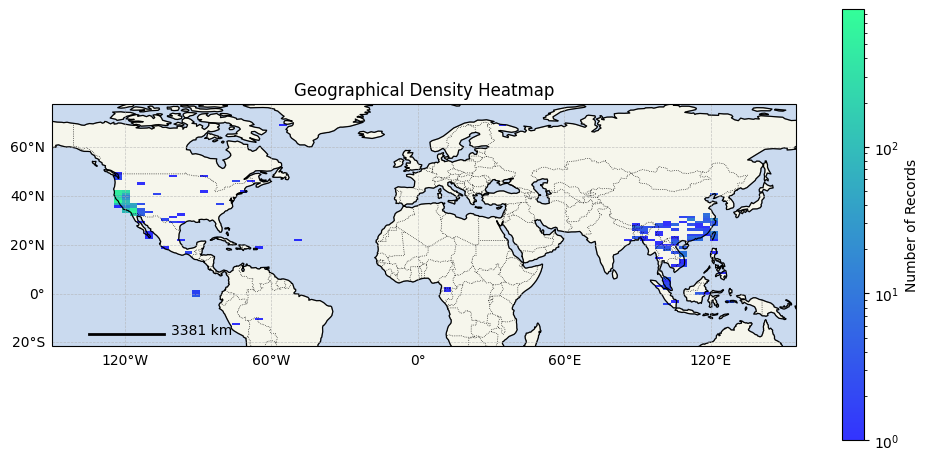

/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


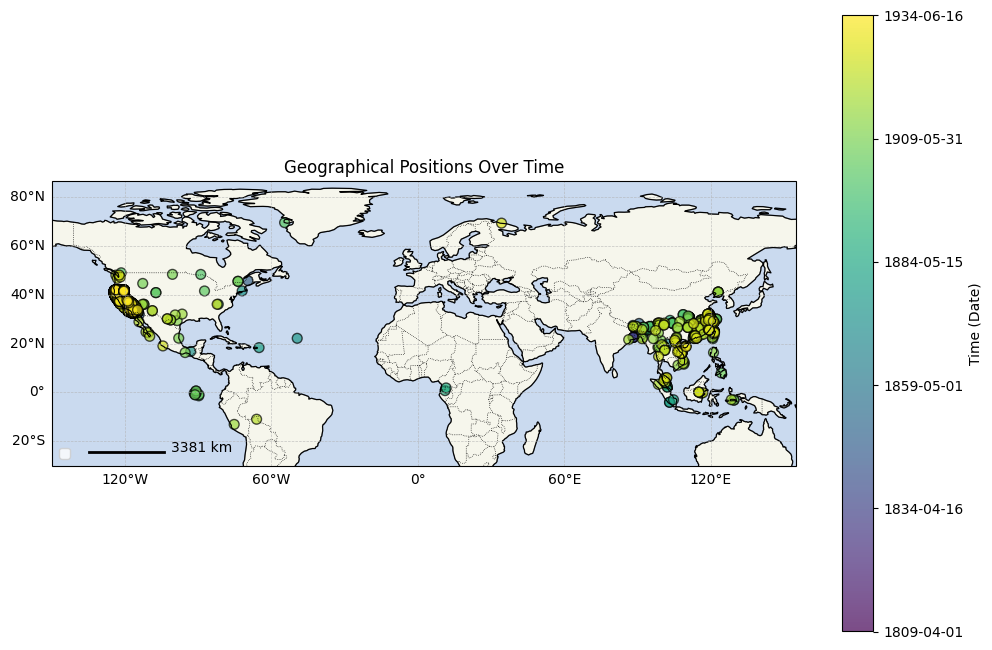

In [11]:
sample = df.sample(min(5000, len(df)), random_state=42)
plot_geographical_heatmap(sample, lat_col="latitude1", lon_col="longitude1", zoom="auto", grid_size=80)
plot_geographical_positions(
    sample,
    lat_col="latitude1",
    lon_col="longitude1",
    datetime_col="startdate",
    zoom="auto",
    cluster_line=False,
)


## Temporal distribution
Histogram of collection dates.

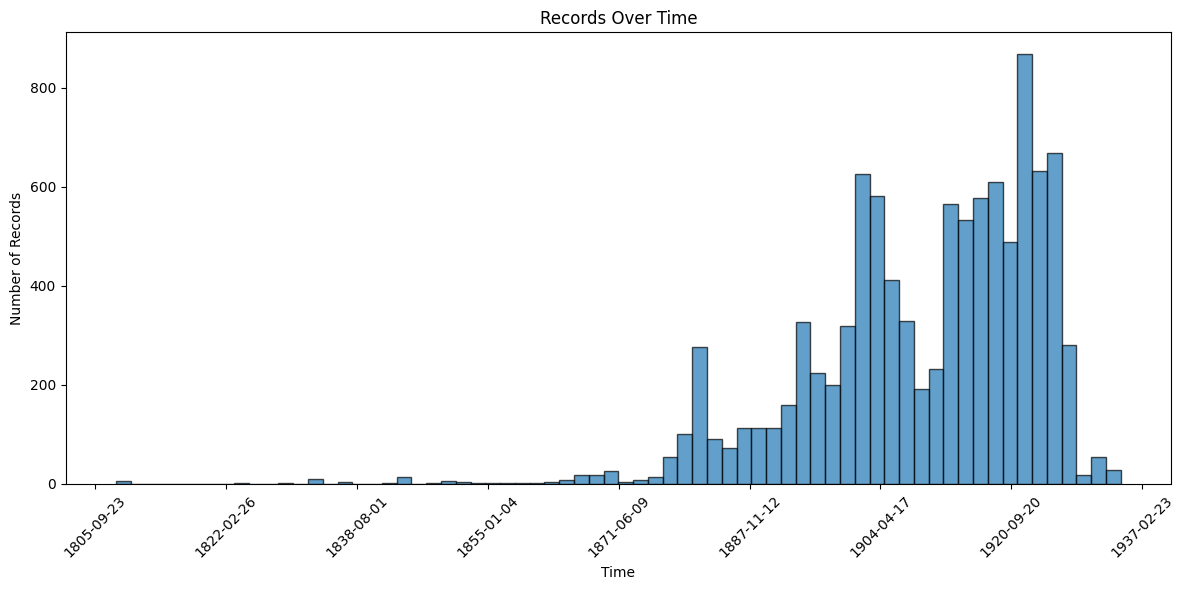

In [12]:
plot_time_histogram(df, datetime_col="startdate", bins="auto")


Selected cluster IDs: [np.int64(2418), np.int64(2472), np.int64(1379), np.int64(2456), np.int64(2384), np.int64(2386), np.int64(2488), np.int64(1523), np.int64(1746), np.int64(2282)]
Plotting cluster 2418 (n=108)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


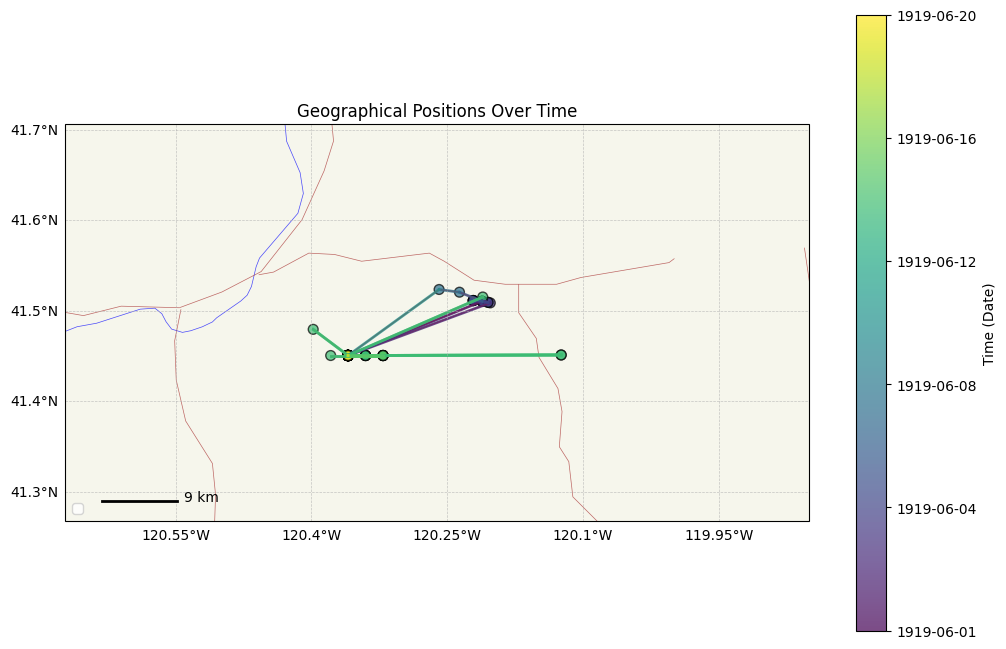

Plotting cluster 2472 (n=94)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


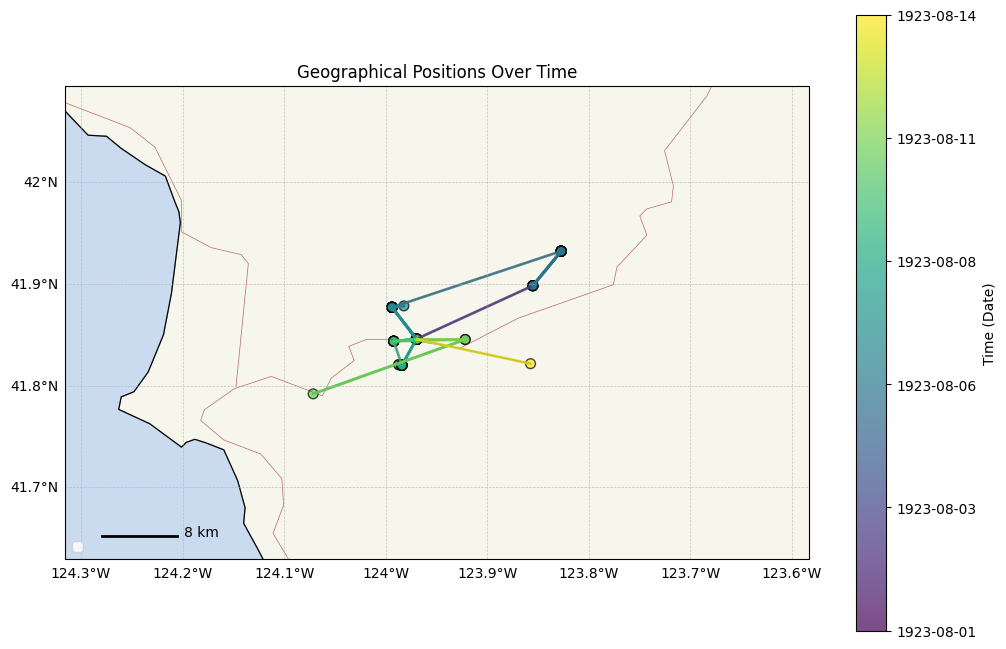

Plotting cluster 1379 (n=70)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


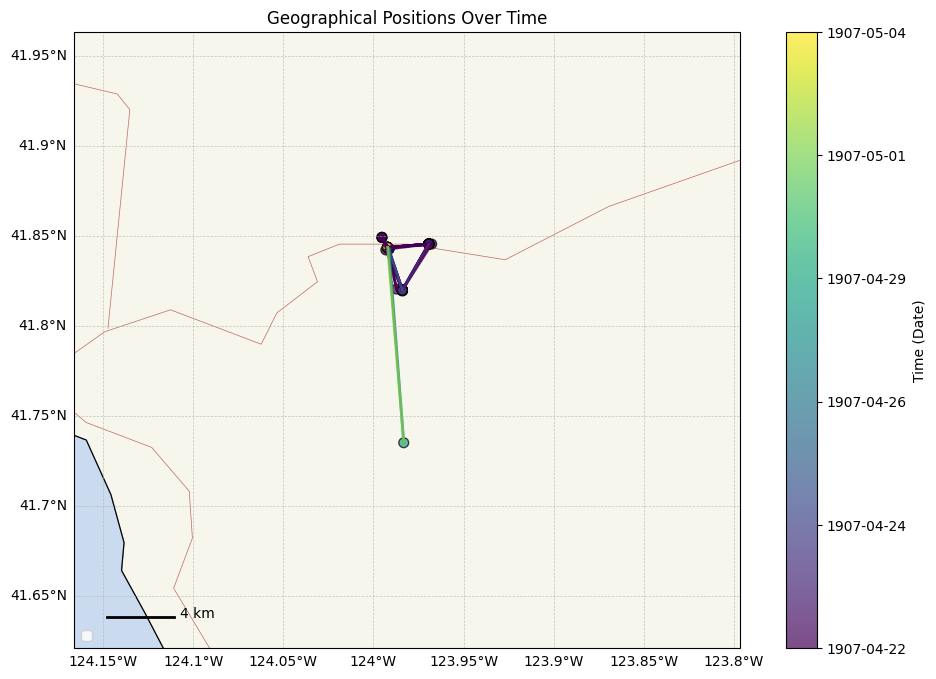

Plotting cluster 2456 (n=68)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


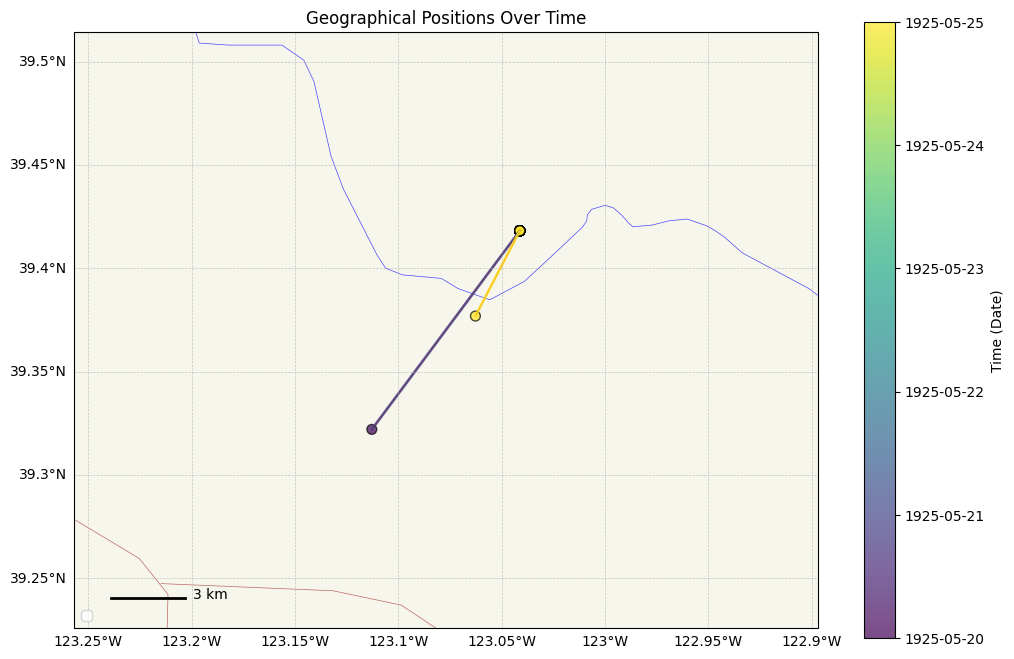

Plotting cluster 2384 (n=59)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


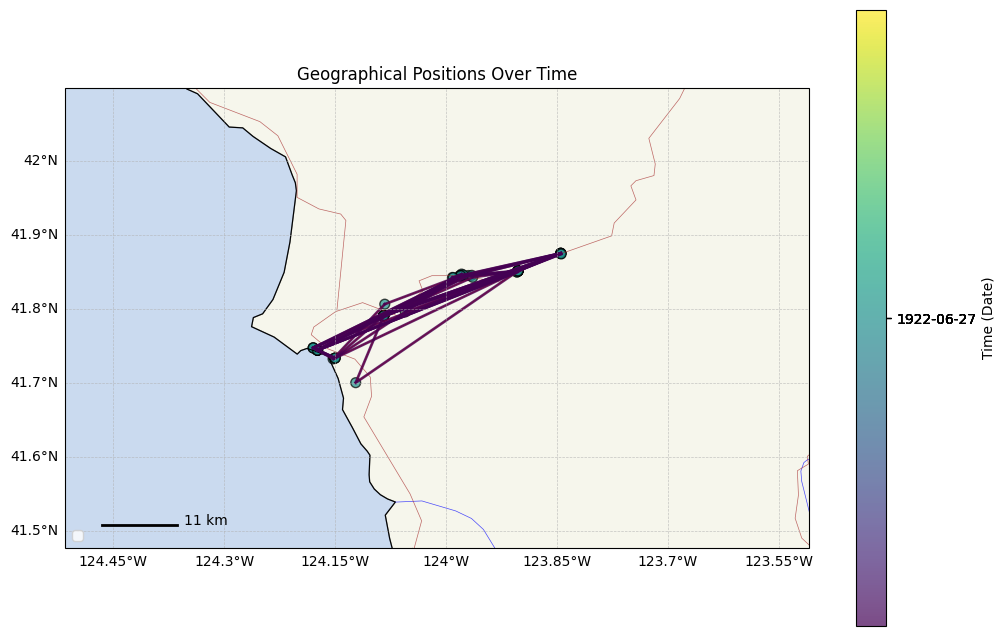

Plotting cluster 2386 (n=55)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


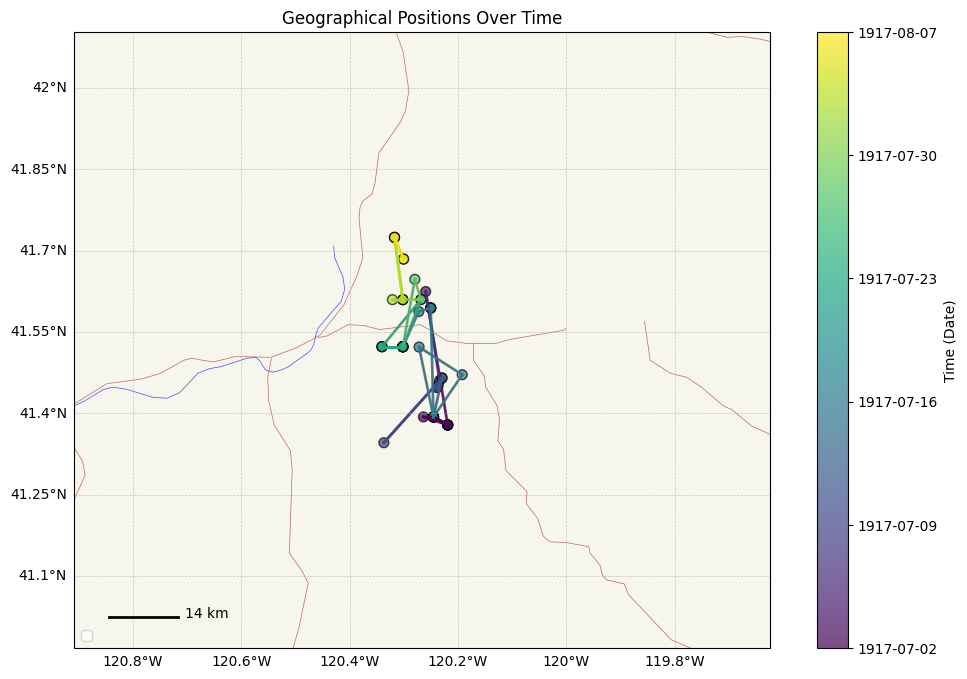

Plotting cluster 2488 (n=48)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


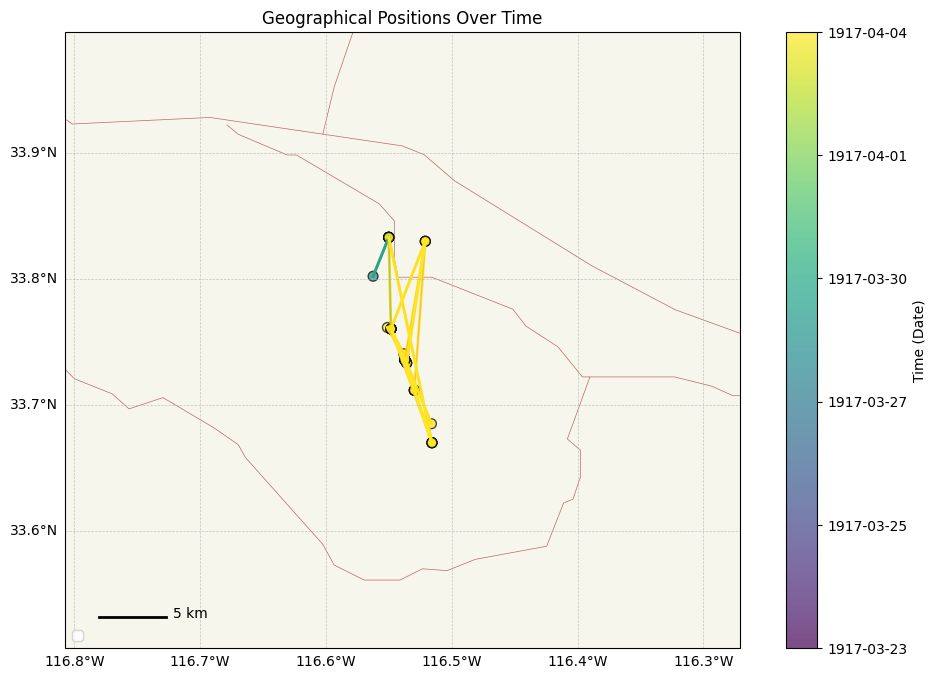

Plotting cluster 1523 (n=20)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


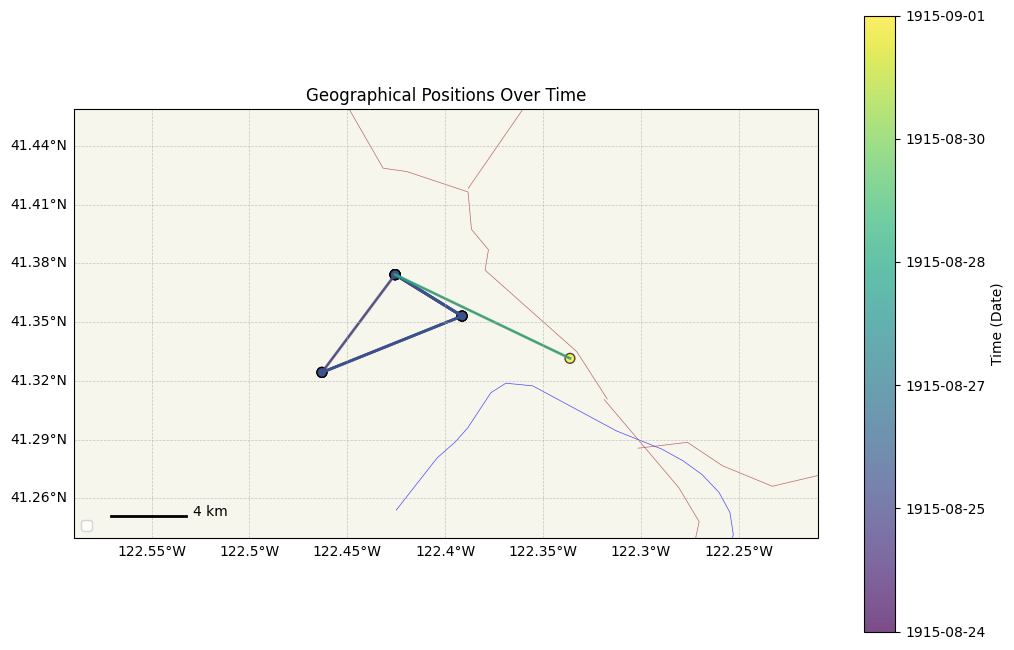

Plotting cluster 1746 (n=10)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


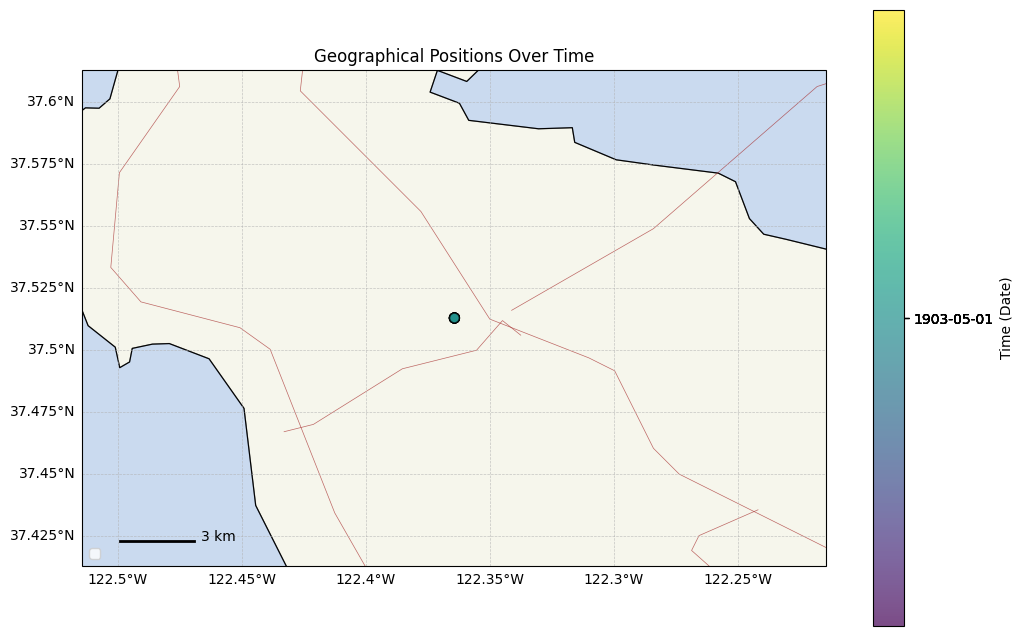

Plotting cluster 2282 (n=2)


/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Developer/cas/expedition-clustering/expedition_clustering/plotting.py:230: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


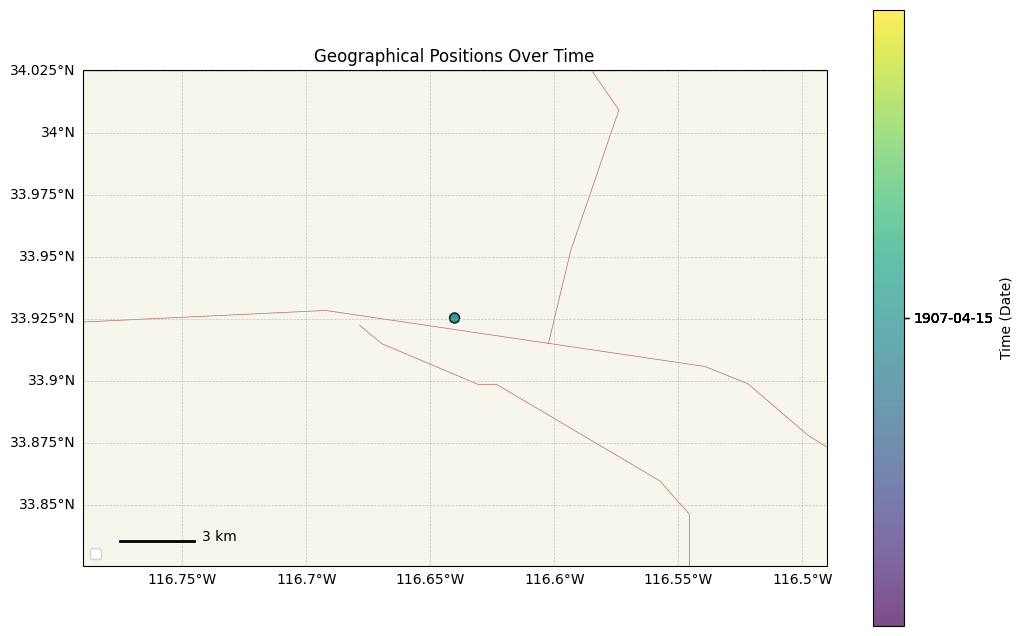

In [13]:
import pandas as pd

from expedition_clustering.plotting import plot_geographical_positions

sizes = df.groupby("spatiotemporal_cluster_id").size()

targets = [2000, 1500, 1000, 500, 200, 100, 50, 20, 10, 2]
selected = []
used = set()
for t in targets:
    # pick nearest size not already used
    nearest = sizes[~sizes.index.isin(used)].iloc[(sizes[~sizes.index.isin(used)] - t).abs().argsort()].index[0]
    selected.append(nearest)
    used.add(nearest)

print("Selected cluster IDs:", selected)
for cid in selected:
    sub = df[df["spatiotemporal_cluster_id"] == cid]
    print(f"Plotting cluster {cid} (n={len(sub)})")
    plot_geographical_positions(
        sub, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
        zoom=1, cluster_line=True, plot_towns=False, plot_rivers=True, plot_roads=True
    )
